In [9]:
import qiskit as q
%matplotlib inline

In [10]:
from qiskit.visualization import plot_histogram
from qiskit.tools.visualization import plot_bloch_multivector

In [11]:
#secretnum = '10100'
# convert decimal num to binary
a = int(input("Enter Secret Number:"))
secretnum = "{0:b}".format(a)

Enter Secret Number:101


C:\Users\Minnu\anaconda3\lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


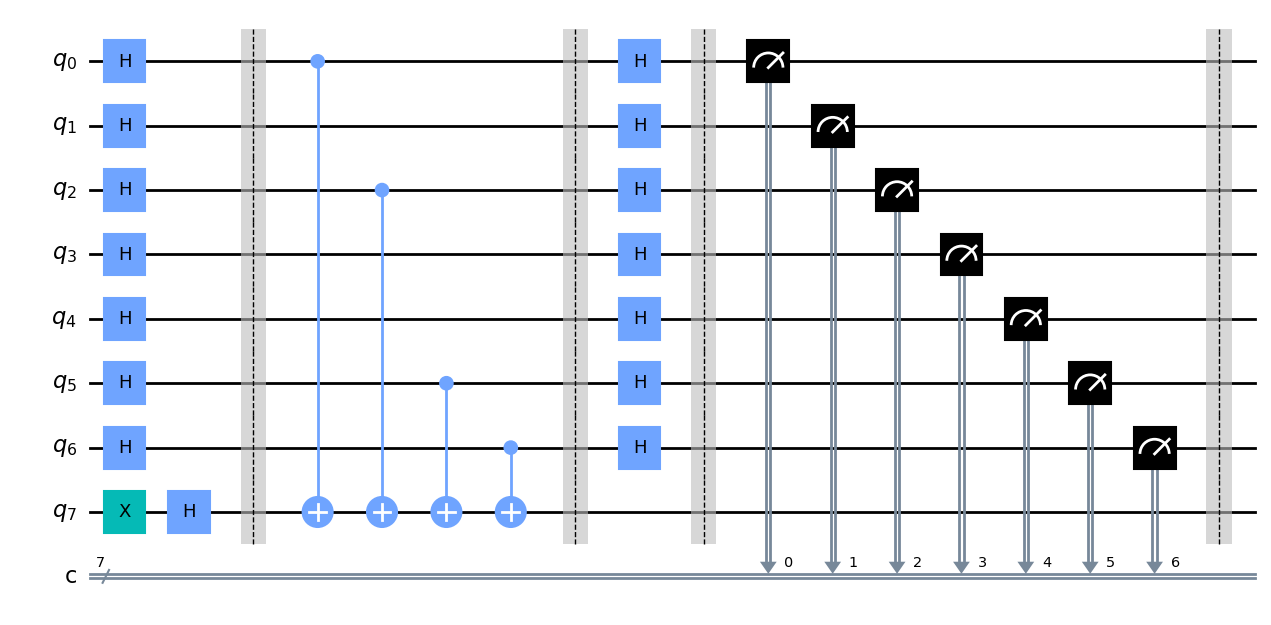

In [12]:
circuit = q.QuantumCircuit(len(secretnum)+1, len(secretnum))

# circuit.h([0,1,2,3,4,5])
circuit.h(range(len(secretnum)))

# circuit.x(6)
# circuit.h(6)
circuit.x(len(secretnum))
circuit.h(len(secretnum))
circuit.barrier()

for i, j in enumerate(reversed(secretnum)):
  if j == '1':
    circuit.cx(i, len(secretnum))

# circuit.cx(5, 6)
# circuit.cx(3, 6)
# circuit.cx(0, 6)
circuit.barrier()

# circuit.h([0,1,2,3,4,5])
circuit.h(range(len(secretnum)))
circuit.barrier()

# circuit.measure([0,1,2,3,4,5],[0,1,2,3,4,5])
circuit.measure(range(len(secretnum)),range(len(secretnum)))
circuit.barrier()

circuit.draw(output='mpl')

In [13]:
simulator = q.Aer.get_backend('qasm_simulator')
result = q.execute(circuit, backend=simulator, shots=1).result()
counts = result.get_counts()

print(counts)

{'1100101': 1}


In [14]:
counts = str(counts)
counts = (counts[2:len(secretnum)+2])
print(counts)

1100101


In [15]:
# convert binary num to decimal
num = int(counts, 2) 
print("Your Secret Number is :", num)

Your Secret Number is : 101


In [16]:
# convert decimal num to binary
a = "{0:b}".format(50)
print(a)

# convert binary num to decimal
# Convert a to base 2 
s = int(a, 2) 
print(s) 

110010
50
